# Przykład wykorzystania algorytmu Symulowanego Wyżarzania:

Importowanie bibliotek

In [27]:
from numpy.random import randint
from numpy import exp

import matplotlib.pyplot as plt

from SimulatedAnnealing.Solver import Solver
from SimulatedAnnealing.Visualisation.Visualisation import plot_scope

__Definicja funkcji kosztu__
$$
f(x, y) = x^2 + y^2
$$

Definiowanie wszystkich potrzebnych funkcji:

In [28]:
def cost_fun(vec):
    (x, y) = vec

    return x**2 + y**2

def sol_gen_fun(vec):
    (x, y) = vec
    step = 0.01

    if randint(2) == 0:
        if randint(2) == 0:
            x += step
        else:
            x -= step
    else:
        if randint(2) == 0:
            y += step
        else:
            y -= step

    if x < -5:
        x = -5
    if x > 5:
        x = 5
    if y < -5:
        y = -5
    if y > 5:
        y = 5

    return x, y

def colling_fun(_, k):
    temp = (1 - (k + 1) / max_iter)

    if temp <= 10**(-9):
        return 0.0001
    return temp

def prob_fun(delta_en, temp):
    if delta_en < 0:
        return 1
    return exp(-delta_en / (1.380649 * temp))

Definicja parametrów symulacji

In [29]:
max_iter = 10**6
init_temp = 0.1
init_sol = (2, -2)

Inicjalizacja solvera

In [30]:
solver = Solver()

Wykonanie algorytmu

In [31]:
solver.SolutionType = tuple
solver.init_sol = init_sol
solver.init_temp = init_temp
solver.max_iterations = max_iter

solver.cost = cost_fun
solver.sol_gen = sol_gen_fun
solver.probability = prob_fun
solver.cool = colling_fun

solver.remember_visited_solution = True

In [32]:
sol, scope = solver.simulate_annealing()

Analiza wyników

Solution = (6.230779781013496e-14, -6.231473670403886e-14)


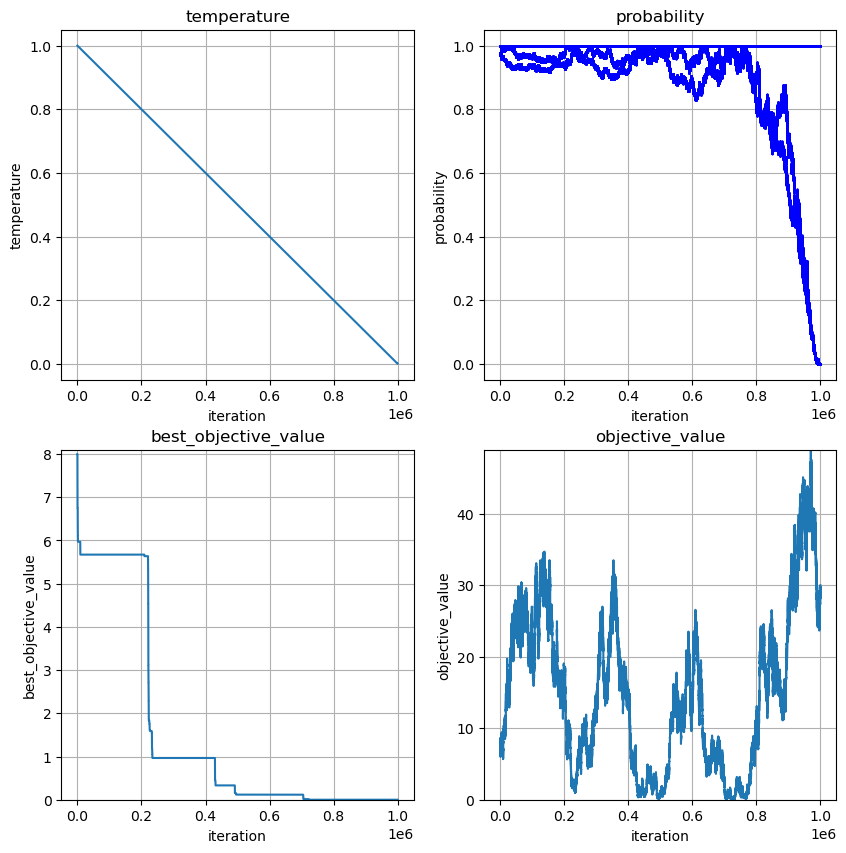

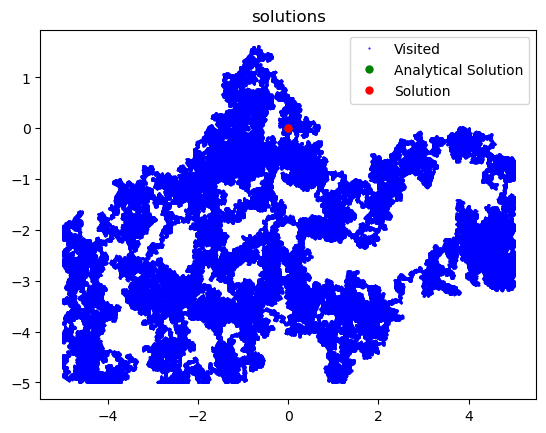

In [33]:
print(f'Solution = {sol}')

plot_scope(scope)

x_vec = [tup[0] for tup in scope.visited_solution]
y_vec = [tup[1] for tup in scope.visited_solution]

plt.plot(x_vec, y_vec, 'b.', markersize=1, label='Visited')
plt.plot(0, 0, 'g.', markersize=10, label='Analytical Solution')
plt.plot(sol[0], sol[1], 'r.', markersize=10, label='Solution')
plt.title('solutions')
plt.legend()
plt.show()

__Modyfikacja funkcji chłodzenia__

In [34]:
def colling_fun(_, k):
    temp = init_temp * exp(-k / max_iter * 10)

    return temp

In [35]:
solver.cool = colling_fun
sol, scope = solver.simulate_annealing()

Solution = (-0.1000000000000623, -0.33000000000006247)


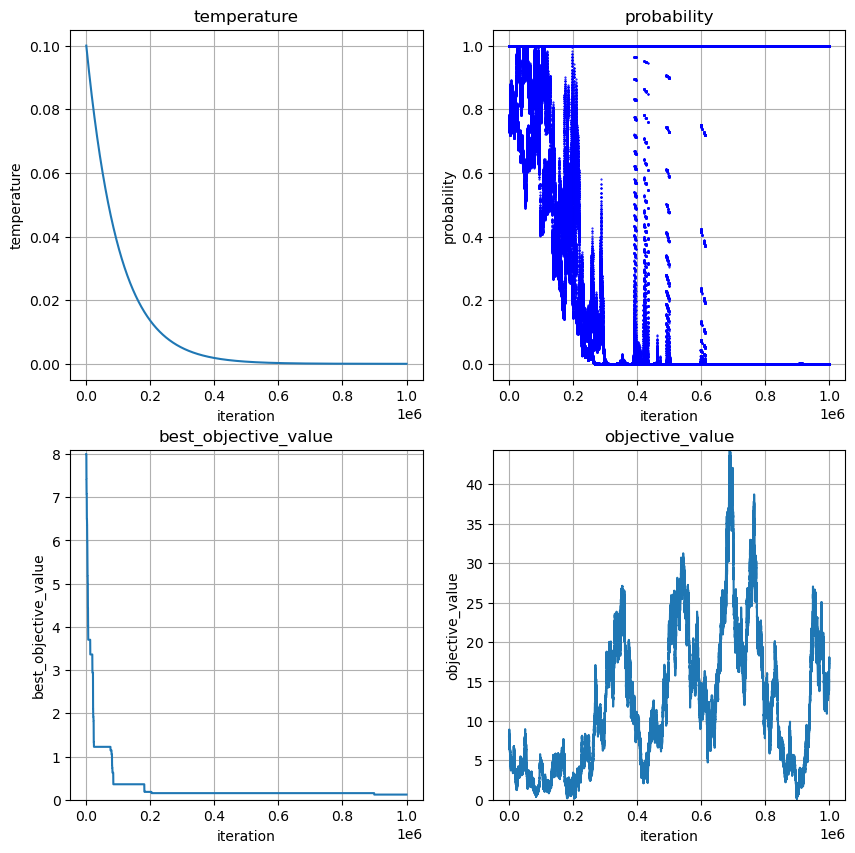

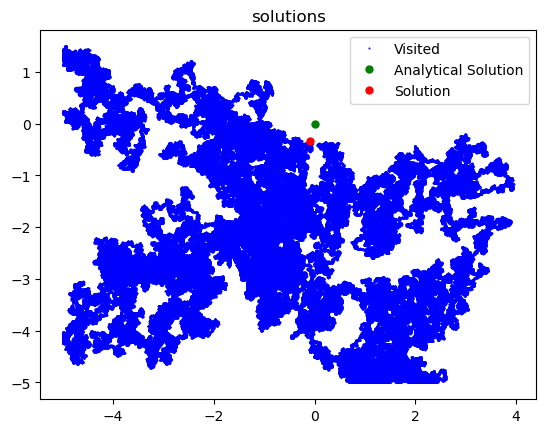

In [36]:
print(f'Solution = {sol}')

plot_scope(scope)

x_vec = [tup[0] for tup in scope.visited_solution]
y_vec = [tup[1] for tup in scope.visited_solution]

plt.plot(x_vec, y_vec, 'b.', markersize=1, label='Visited')
plt.plot(0, 0, 'g.', markersize=10, label='Analytical Solution')
plt.plot(sol[0], sol[1], 'r.', markersize=10, label='Solution')
plt.title('solutions')
plt.legend()
plt.show()